In [4]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [85]:
f = 2*7.3e-5*np.sin(51)
g = 9.81

def t_arr(dT):
    t = np.arange(0,60*3600, dT)
    u_arr = np.zeros(len(t))
    v_arr = np.zeros(len(t))
    return t, u_arr, v_arr
    
def u(dT):
    t, u_arr, v_arr = t_arr(dT)
    return 10*np.cos(f*t)

def v(dT):
    t, u_arr, v_arr = t_arr(dT)
    return -10*np.sin(f*t)

def V(dT):
    t, u_arr, v_arr = t_arr(dT)
    return np.sqrt(u(t)**2 + v(t)**2) 

def ekin(u,v):
    E = 0.5*(u**2+v**2)
    return E

def error(method, dT_arr=[10,20,50,100,200,500,1000]):
    errors = np.zeros(len(dT_arr))
    for i, dT in enumerate(dT_arr):
        u_num, v_num, V_num = method(dT)
        u_ana, v_ana = u(dT), v(dT)
        V_ana = np.sqrt(u_ana**2 + v_ana**2)
        errors[i] = abs(V_ana[-1] - V_num[-1])
    return errors

def plotmachine(t,u_num,v_num,KE,method):
    fig, axs = plt.subplots(figsize=(20,16), nrows=2, ncols=2)
    axs[0,0].plot(t/3600, u_num, label='Numerical', color='tab:red')
    axs[0,0].plot(t/3600, u(300), label='Analytical', color='black')
    axs[0,0].set_xlabel('Time(h)')
    axs[0,0].set_ylabel('u (m/s)')
    axs[0,0].grid()
    axs[0,0].legend()
    axs[0,0].set_title('Numerical vs Analytical solution for u(t)')
    
    axs[0,1].plot(t/3600, v_num, label='Numerical', color='tab:red')
    axs[0,1].plot(t/3600, v(300), label='Analytical', color='black')
    axs[0,1].set_xlabel('Time(h)')
    axs[0,1].set_ylabel('u (m/s)')
    axs[0,1].grid()
    axs[0,1].legend()
    axs[0,1].set_title('Numerical vs Analytical solution for v(t)')
    
    axs[1,0].plot(t/3600, KE)
    axs[1,0].set_xlabel('Time(h)')
    axs[1,0].set_ylabel('KE $(m^2/s^2)$')
    axs[1,0].grid()
    axs[1,0].set_title('Kinetic Energy over time')
    axs[1,0].set_ylim(25,100)
    
    
    errors = error(method)
    
    axs[1,1].loglog([10,20,50,100,200,500,1000], errors, '.')
    axs[1,1].set_xlabel(r'$\Delta$ t [s]')
    axs[1,1].set_ylabel('Error V [m/s]')
    axs[1,1].set_title('Error in V at different time intervals')
    axs[1,1].grid()
    
   
    fig.tight_layout()

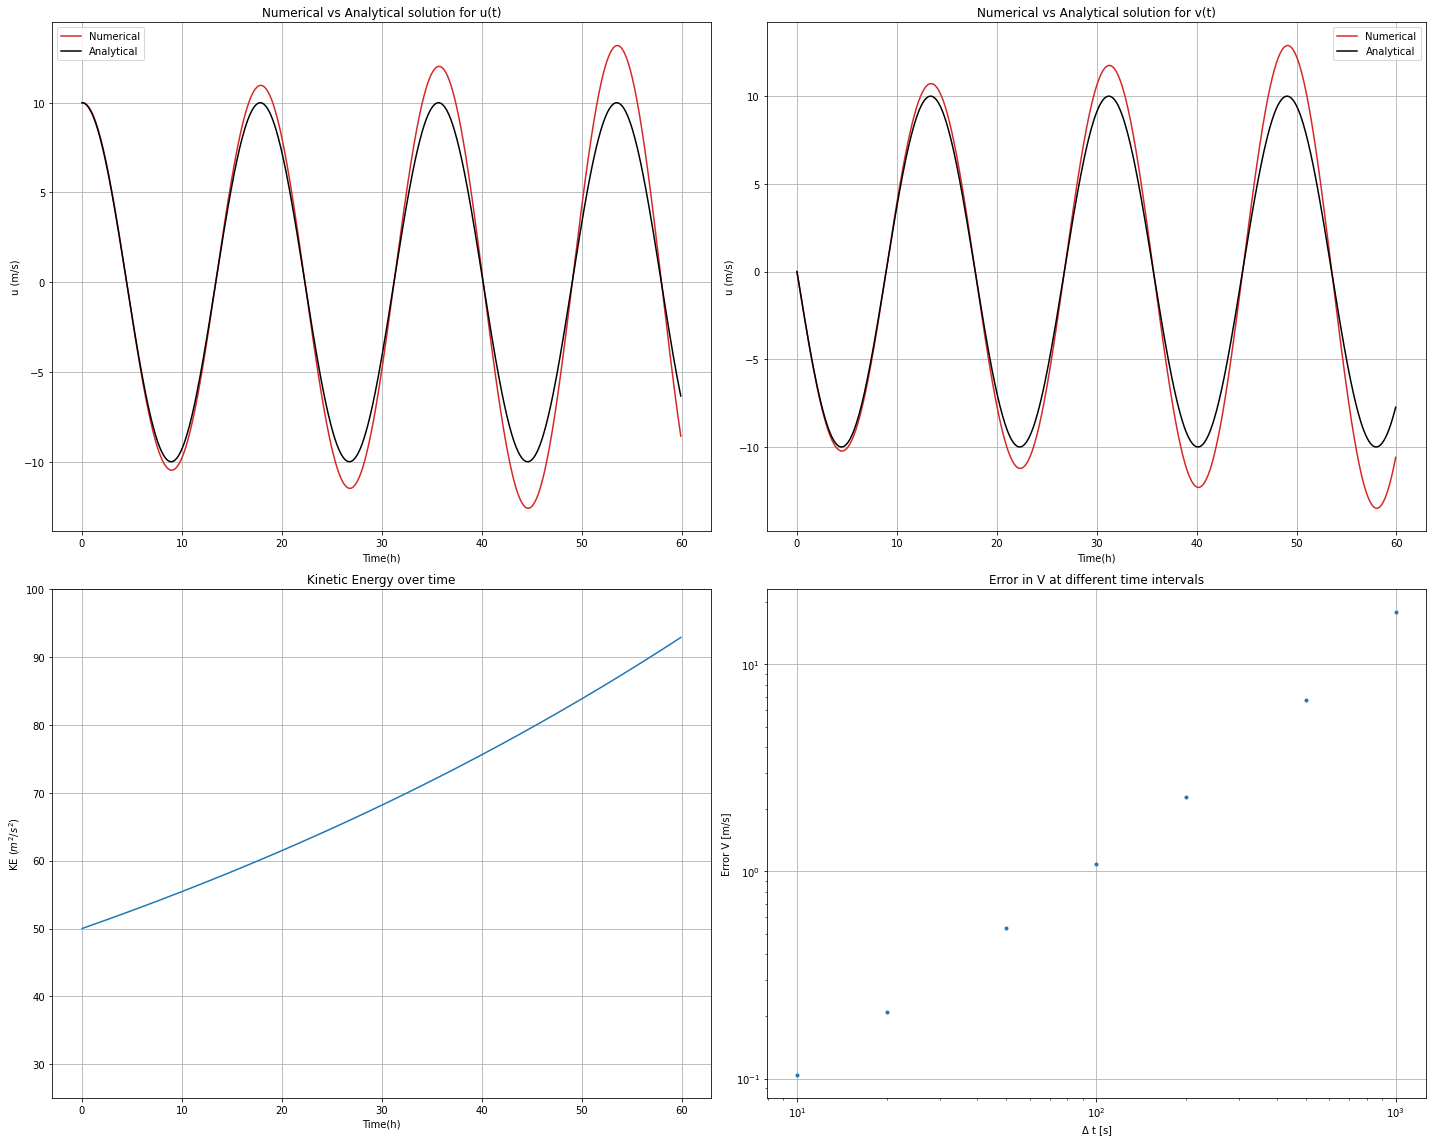

In [26]:
#Euler forward
def EulerForward(dT):
    t, u_arr, v_arr = t_arr(dT)
    u_arr[0] = 10
    v_arr[0] = 0
    for i in range(len(t) - 1):
        u_arr[i+1] = u_arr[i] + dT*f*v_arr[i]
        v_arr[i+1] = v_arr[i] - dT*f*u_arr[i]
        V = np.sqrt(u_arr**2 + v_arr**2)
    return u_arr, v_arr, V

u_EF, v_EF, V_EF = EulerForward(dT=300)

plotmachine(t_arr(dT=300)[0], u_EF, v_EF,ekin(u_EF, v_EF),EulerForward)


## Leapfrog scheme

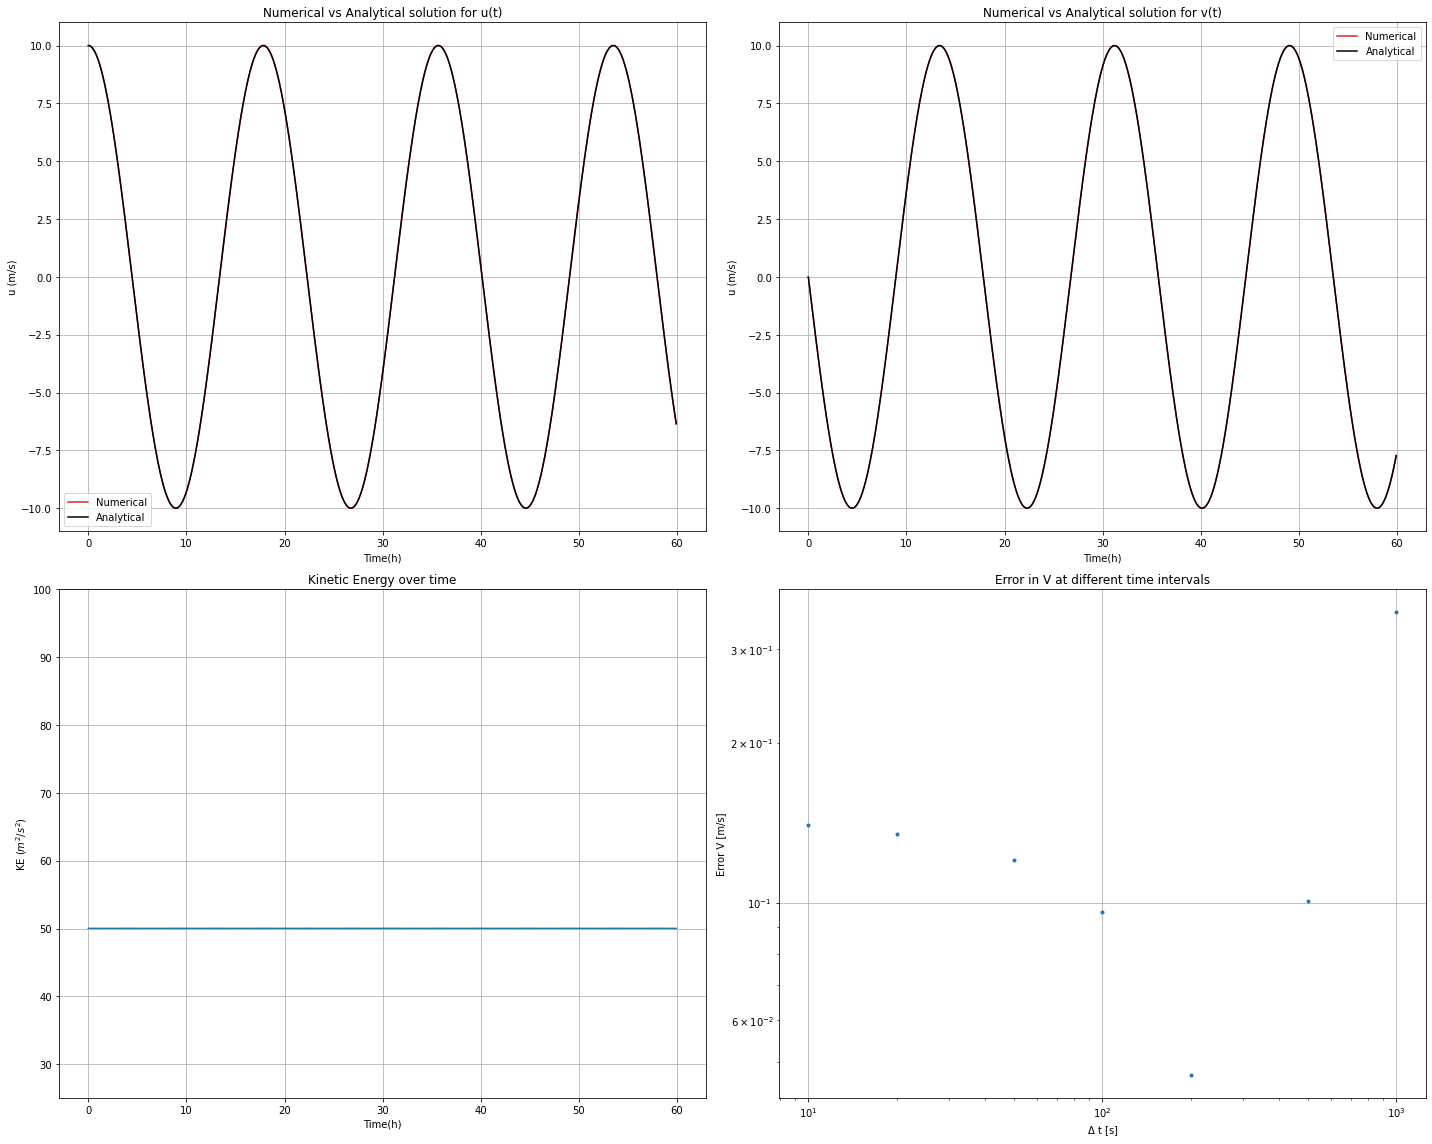

In [27]:
%matplotlib inline
def LeapFrog(dT):
    t, u_arr, v_arr = t_arr(dT)
    u_arr = np.zeros(len(t))
    v_arr = np.zeros(len(t))

    u_arr[0] = 10
    v_arr[0] = 0
    u_arr[1] = u_EF[1]
    v_arr[1] = v_EF[1]
    for i in range(1, len(t) - 1):
        u_arr[i+1] = 2*dT*f*v_arr[i] + u_arr[i-1]
        v_arr[i+1] = -2*dT*f*u_arr[i] + v_arr[i-1]
    V = np.sqrt(u_arr**2 + v_arr**2)
    return u_arr, v_arr, V

u_LF, v_LF, V_LF = LeapFrog(dT=300)

plotmachine(t_arr(dT=300)[0], u_LF, v_LF,ekin(u_LF, v_LF),LeapFrog)

#LF much more accurate than EF!

## Matsuno’s scheme

In [29]:
def Matsuno(dT):
    t, u_arr, v_arr = t_arr(dT)
    u_arr = np.zeros(len(t))
    v_arr = np.zeros(len(t))
    u_arr[0] = 10
    v_arr[0] = 0
    for i in range(len(t) - 1):
        F_u = f*v_arr[i]
        F_v = -f*u_arr[i]
        u_pred = u_arr[i] + dT*F_u
        v_pred = v_arr[i] + dT*F_v
        F_predu = F_u - dT*f**2*u_arr[i]
        F_predv = F_v - dT*f**2*v_arr[i]
        
        u_arr[i+1] = u_arr[i] + dT*(F_predu)
        v_arr[i+1] = v_arr[i] + dT*(F_predv)
    V = np.sqrt(u_arr**2 + v_arr**2)
    return u_arr, v_arr, V

u_M, v_M, V_M = Matsuno(dT=300)

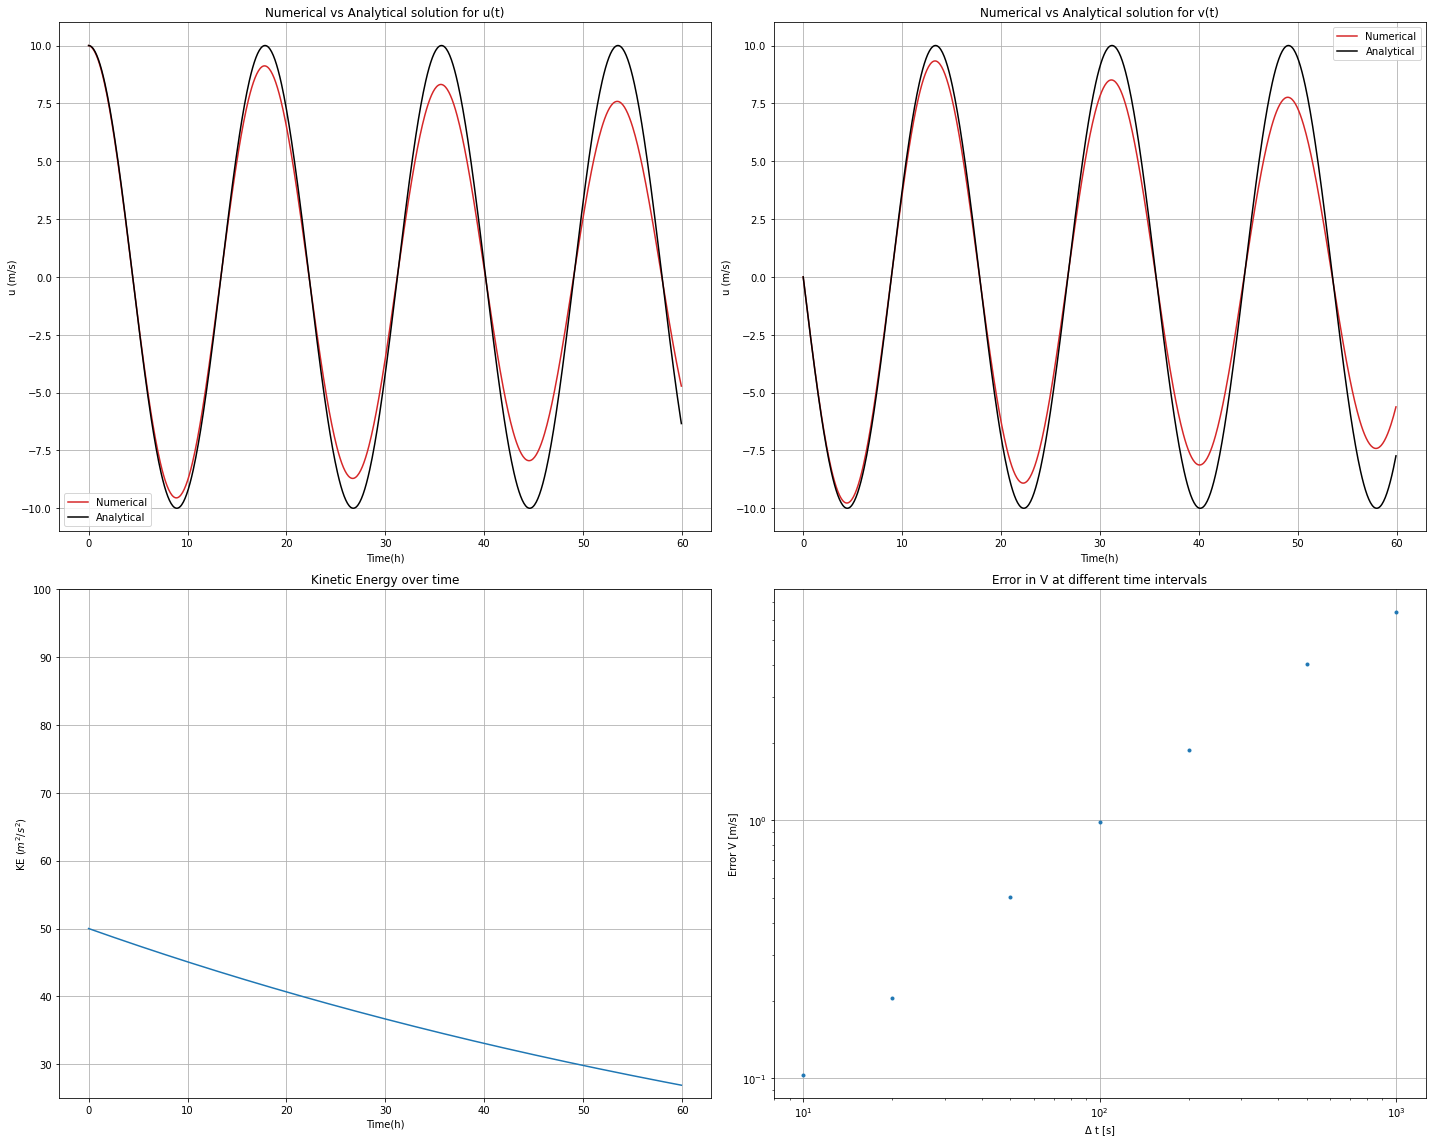

In [30]:
plotmachine(t_arr(dT=300)[0], u_M, v_M,ekin(u_M, v_M), Matsuno)

## Heun's scheme

In [31]:
def Heun(dT):
    t, u_arr, v_arr = t_arr(dT)
    u_arr = np.zeros(len(t))
    v_arr = np.zeros(len(t))
    u_arr[0] = 10
    v_arr[0] = 0
    for i in range(len(t) - 1):
        F_u = f*v_arr[i]
        F_v = -f*u_arr[i]
        u_pred = u_arr[i] + dT*F_u
        v_pred = v_arr[i] + dT*F_v
        #Calculated these with pen and paper
        F_predu = F_u - dT*f**2*u_arr[i]
        F_predv = F_v - dT*f**2*v_arr[i]
        
        u_arr[i+1] = u_arr[i] + dT*(.5*F_u + .5*F_predu)
        v_arr[i+1] = v_arr[i] + dT*(.5*F_v + .5*F_predv)
    V = np.sqrt(u_arr**2 + v_arr**2)
    return u_arr, v_arr, V

u_H, v_H, V_H = Heun(dT=300)

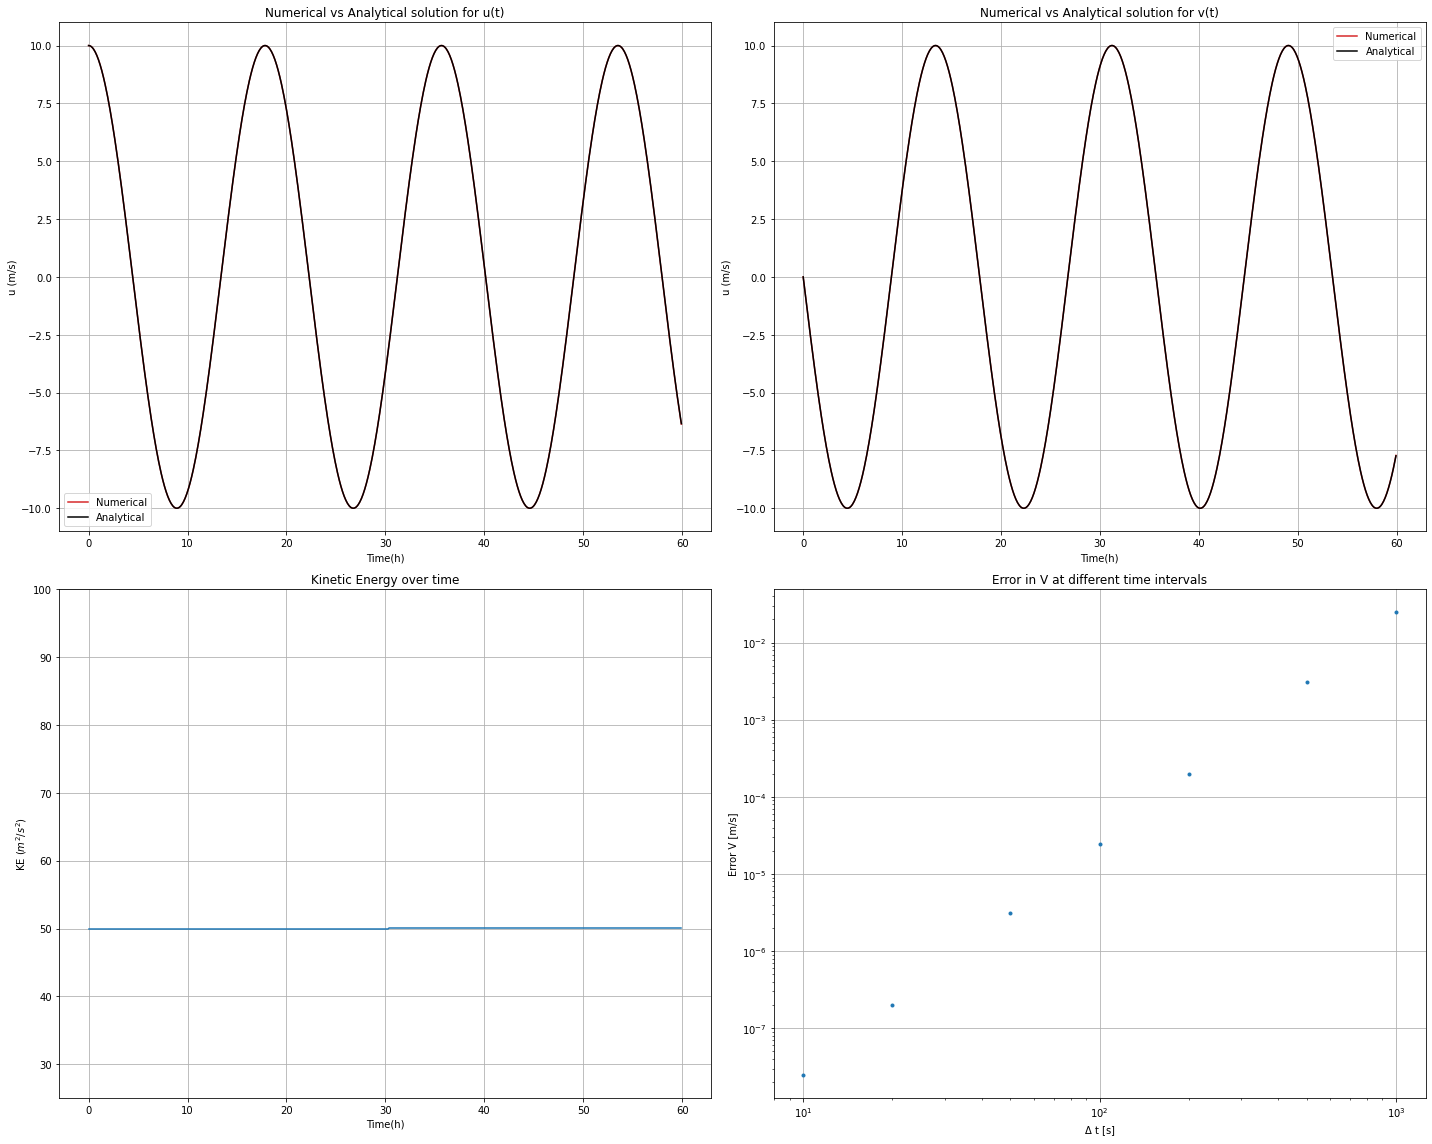

In [32]:
plotmachine(t_arr(dT=300)[0], u_H, v_H,ekin(u_H, v_H), Heun)

# Intercomparison project

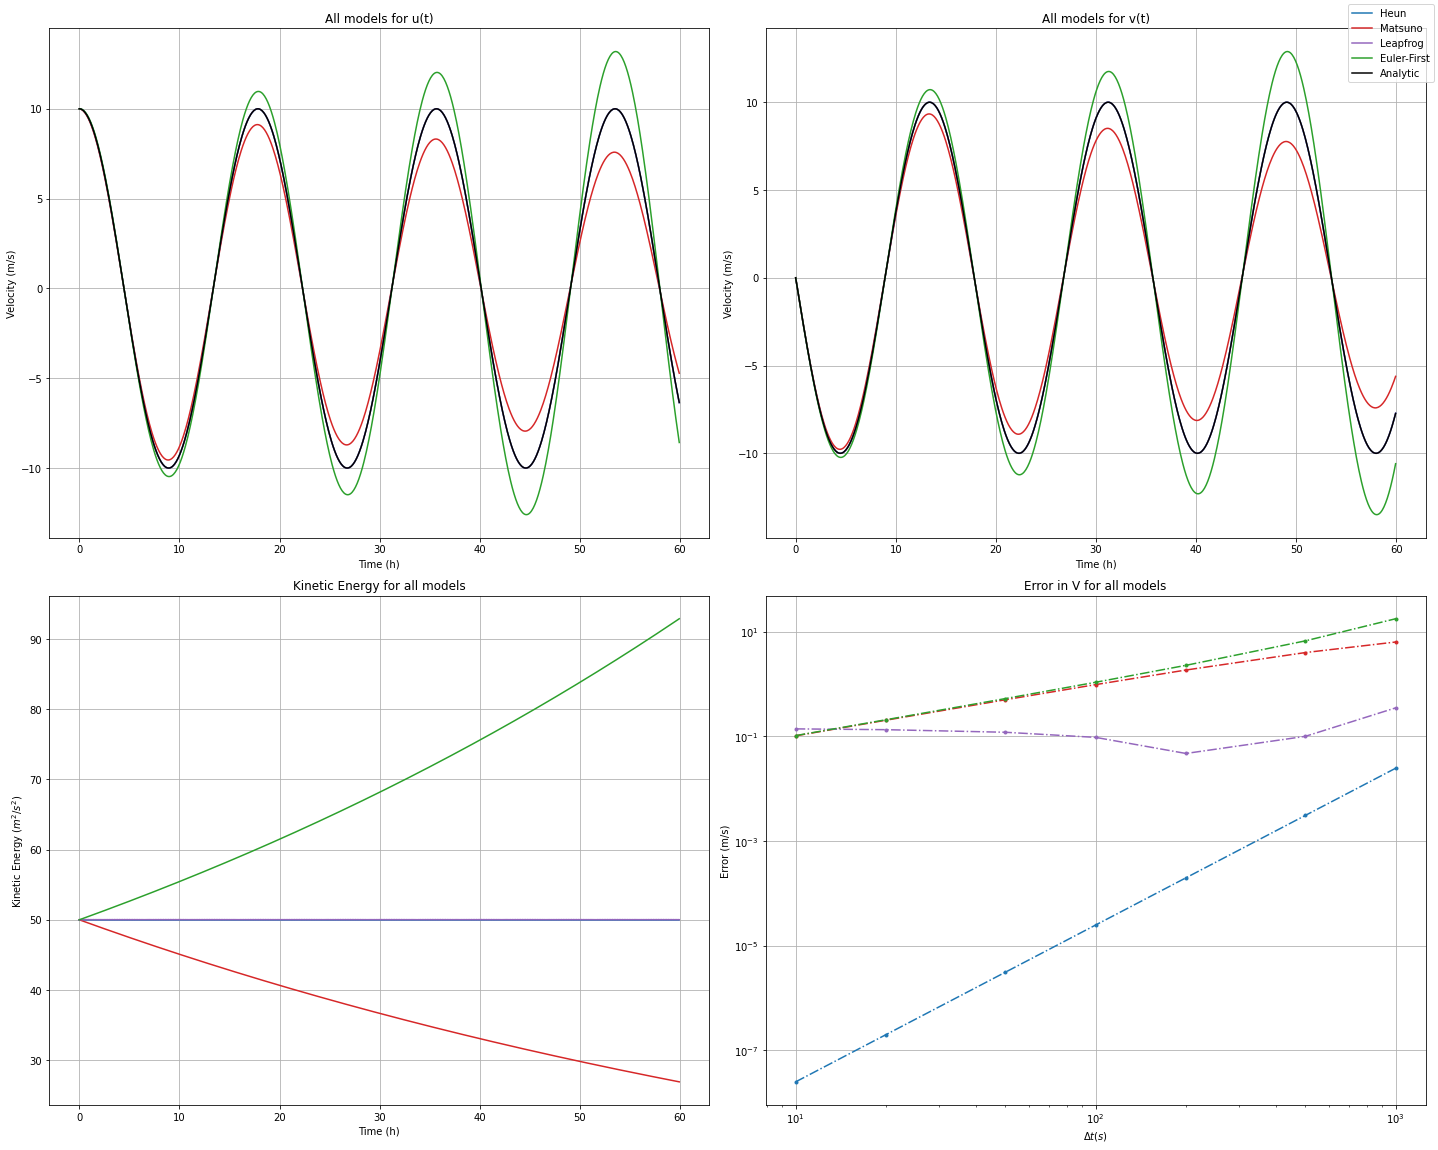

In [88]:
fig, axs = plt.subplots(figsize=(20,16),nrows=2, ncols=2)

axs[0,0].plot(t_arr(dT=300)[0]/3600, u_H, label="Heun", c='tab:blue')
axs[0,0].plot(t_arr(dT=300)[0]/3600, u_M, label="Matsuno", c='tab:red')
axs[0,0].plot(t_arr(dT=300)[0]/3600, u_LF, label="Leapfrog", c='tab:purple')
axs[0,0].plot(t_arr(dT=300)[0]/3600, u_EF, label="Euler-First", c='tab:green')
axs[0,0].plot(t_arr(dT=300)[0]/3600, u(dT=300), label="Analytic",c='black')
# axs[0].legend()
axs[0,0].grid()
axs[0,0].set_title('All models for u(t)')
axs[0,0].set_xlabel('Time (h)')
axs[0,0].set_ylabel('Velocity (m/s)')


axs[0,1].plot(t_arr(dT=300)[0]/3600, v_H, c='tab:blue')
axs[0,1].plot(t_arr(dT=300)[0]/3600, v_M, c='tab:red')
axs[0,1].plot(t_arr(dT=300)[0]/3600, v_LF,c='tab:purple')
axs[0,1].plot(t_arr(dT=300)[0]/3600, v_EF, c='tab:green')
axs[0,1].plot(t_arr(dT=300)[0]/3600, v(dT=300),c='black')
# axs[1].legend()
axs[0,1].grid()
axs[0,1].set_title('All models for v(t)')
axs[0,1].set_xlabel('Time (h)')
axs[0,1].set_ylabel('Velocity (m/s)')


axs[1,0].plot(t_arr(dT=300)[0]/3600,ekin(u_H, v_H), c='tab:blue')
axs[1,0].plot(t_arr(dT=300)[0]/3600,ekin(u_M, v_M), c='tab:red')
axs[1,0].plot(t_arr(dT=300)[0]/3600,ekin(u_LF, v_LF),c='tab:purple')
axs[1,0].plot(t_arr(dT=300)[0]/3600,ekin(u_EF, v_EF), c='tab:green')
axs[1,0].grid()
axs[1,0].set_title('Kinetic Energy for all models')
axs[1,0].set_ylabel('Kinetic Energy $(m^2/s^2)$')
axs[1,0].set_xlabel('Time (h)')

axs[1,1].loglog([10,20,50,100,200,500,1000], error(Heun), '.-.', c='tab:blue')
axs[1,1].loglog([10,20,50,100,200,500,1000], error(Matsuno), '.-.', c='tab:red')
axs[1,1].loglog([10,20,50,100,200,500,1000], error(LeapFrog), '.-.',c='tab:purple')
axs[1,1].loglog([10,20,50,100,200,500,1000], error(EulerForward), '.-.', c='tab:green')
axs[1,1].set_title('Error in V for all models')
axs[1,1].set_xlabel(r'$\Delta t (s)$')
axs[1,1].set_ylabel('Error (m/s)')
axs[1,1].grid()



fig.legend()
fig.tight_layout()